# Forecasting the Volume of Reserves in Oil Wells

The assignment is to find the best region for new wells for the mining company.

There are data on oil samples from three regions with the parameters of each oil well in the region.

The purpose of the study: to build a model for predicting the volume of reserves in the new wells in order to pick the oil wells with the highest estimated volume and choose the region with the highest expected profit margin and acceptable risk of losses.

The work plan:

<a href='#section1'>1. Getting the data and studying the general information</a>

<a href='#section2'>2. Exploratory data analysis</a>

<a href='#section3'>3. Building a model to predict volume of reserves for each region</a>

<a href='#section4'>4. Estimation of the expected profit and risks in the development of new oil wells</a>

<a href='#section5'>5. Overall conclusion and basic recommendations</a>

In [1]:
# importing of libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error 

# some global constats for formatting the output string
BOLD = '\033[1m'
END = '\033[0m'

## 1. Getting the Data and Studying the General Information
<a id='section1'></a>

Let's get the data and look at the general information.

In [2]:
# reading files containing data on the oil samples in 3 regions
data = []
for i in range(3):
    print(BOLD + 'Region {}:'.format(i) + END)
    path = '/datasets/geo_data_' + str(i) + '.csv'
    path_local = 'geo_data_' + str(i) + '.csv'
    
    try:
        df = pd.read_csv(path)
    except:
        df = pd.read_csv(path_local)
    
    data.append(df)
    
    # looking at the data's general information.
    print('General inforamation about the table contains oil samples data:') 
    print()
    df.info()
    print()
    
    #looking at the first few rows in a table
    print('The first rows of the table contains oil samples data:')
    display(df.head())
    print()

Region 0:
General inforamation about the table contains oil samples data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

The first rows of the table contains oil samples data:


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647



Region 1:
General inforamation about the table contains oil samples data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

The first rows of the table contains oil samples data:


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305



Region 2:
General inforamation about the table contains oil samples data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

The first rows of the table contains oil samples data:


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


_There are three regions. Data on oil samples parameters and volume of reserves of 100,000 wells in each region are available._

Let's take a look at the distribution of the oil samples characteristics and the volume of reserves for each region.

The desciptive statistics of oil sample features and the volume of reserves
Region 0:


,f0,f1,f2,product
count,100000.00,100000.00,100000.00,100000.00
mean,0.50,0.25,2.50,92.50
std,0.87,0.50,3.25,44.29
min,-1.41,-0.85,-12.09,0.00
25%,-0.07,-0.20,0.29,56.50
50%,0.50,0.25,2.52,91.85
75%,1.07,0.70,4.72,128.56
max,2.36,1.34,16.00,185.36


The total volume of explored oil in the region is 9,250,000 thousand barells.

Region 1:


,f0,f1,f2,product
count,100000.00,100000.00,100000.00,100000.00
mean,1.14,-4.80,2.49,68.83
std,8.97,5.12,1.70,45.94
min,-31.61,-26.36,-0.02,0.00
25%,-6.30,-8.27,1.00,26.95
50%,1.15,-4.81,2.01,57.09
75%,8.62,-1.33,4.00,107.81
max,29.42,18.73,5.02,137.95


The total volume of explored oil in the region is 6,882,500 thousand barells.

Region 2:


,f0,f1,f2,product
count,100000.00,100000.00,100000.00,100000.00
mean,0.00,-0.00,2.50,95.00
std,1.73,1.73,3.47,44.75
min,-8.76,-7.08,-11.97,0.00
25%,-1.16,-1.17,0.13,59.45
50%,0.01,-0.01,2.48,94.93
75%,1.16,1.16,4.86,130.60
max,7.24,7.84,16.74,190.03


The total volume of explored oil in the region is 9,500,000 thousand barells.

The distribution of oil samples features by regions:


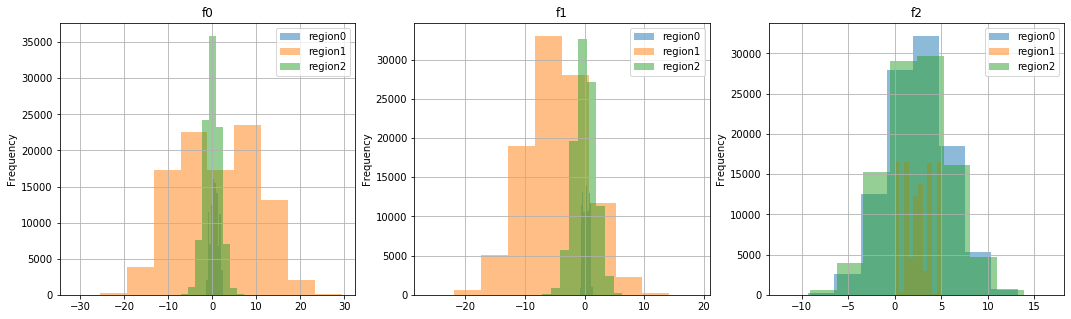

The distribution of the volume of reserves by regions:


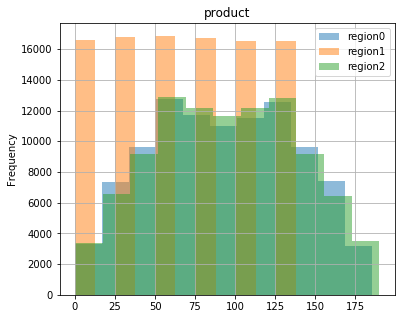

In [4]:
print(BOLD + 'The desciptive statistics of oil sample features and the volume of reserves' + END)
for i in range(3):
    print('Region {}:'.format(i))
    display(data[i].describe().round(2))
    print('The total volume of explored oil in the region is {:,.0f} thousand barells.'\
              .format(data[i]['product'].sum()))
    print()
    
print(BOLD + 'The distribution of oil samples features by regions:' + END)
fig, axes = plt.subplots(ncols=3, figsize=(6*3, 5))
for i in range(3):
    for j, feature in enumerate(['f0', 'f1', 'f2']):
        data[i][feature].hist(alpha=0.5, ax=axes[j], label='region' + str(i))
        axes[j].set_title(feature)
        axes[j].set_ylabel('Frequency')
        axes[j].legend()
plt.show()

print(BOLD + 'The distribution of the volume of reserves by regions:' + END)
fig, ax = plt.subplots(figsize=(6, 5))
for i in range(3):
    data[i]['product'].hist(alpha=0.5, ax=ax, label='region' + str(i), bins=11)
    ax.set_title('product')
    ax.set_ylabel('Frequency')
    ax.legend()

_The distribution of characteristics of oil samples and volume of reserves vary in different regions._

_The `'f0'` feature has a symmetric distribution with a mean value of zero, but the variances for different regions vary: for the region 0 - the smallest, for the region 1 - the largest._ 

_The `'f1'` feature has a symmetric distribution as well. For the regions 0 and 2 the distributions have a zero mean value, for the region 1 the mean is shifted to the area of negative values._

_The `'f2'` feature has a symmetric distribution with a mean value of 2.5, but the variances for the region 1 is much smaller than for the regions 0 and 2._

_The volume of reserves in the regions 0 and 2 has a symmetric distribution. In these regions a well has an average of about 90,000 barrels of oil. The volume of reserves in the region 1 has discrete values and is distributed evenly. Perhaps an approximately equal number of wells are located at a distance evenly moving away from the center of the oil accumulation on an approximately homogeneous terrain. It is worth checking why the distribution is uniform. The data may have been collected incorrectly. Or we can identify additional insights about the region. In the region 1, the well reserves are on average lower by more than 20 thousand barrels. In the region 1, 30% less oil was explored out of all 100 thousand wells._

_Note that there are wells with zero available oil reserves, for the region 0 there are much more of them._

## 2. Exploratory Data Analysis
<a id='section2'></a>

Let's look at correlations between features.

Correlation matrix:


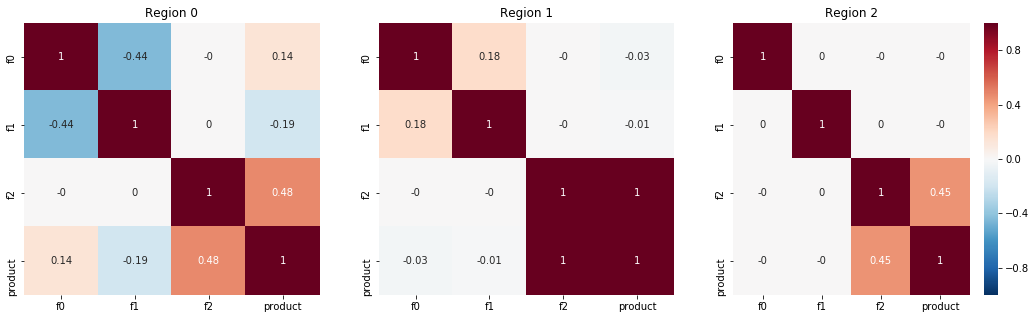

In [5]:
print(BOLD + 'Correlation matrix:'  + END) 
fig, axes = plt.subplots(ncols=3, figsize=(6*3, 5))
for i in range(3):
    sns.heatmap(data[i].corr().round(2),
                annot=True, ax=axes[i], vmin=-1, vmax=1, cmap='RdBu_r', cbar= False if i<2 else True);
    axes[i].set_title('Region {}'.format(i))

_The measure of the linear relationship between the oil samples features differs for each regions. The pair of features `'f0'` and `'f1'` has a negative correlations in the region 0, have a weak positive correlation in the region 1 and a zero correlation in the region 2. The correlations between features `'f0'` and `'f2'`, `'f1'` and `'f2'` are equal zero. There are no multicollinearity issues, so it's not necessary to use regularization for linear regression._

_There is no correlation between `'f0'`, `'f1'` and the target variable (`'product'`) for the regions 1 and 2. For the region 0 the correlation coefficient between 'f0', 'f1' and the target variable is 0.14 and -0.19, respectively. There is a positive correlation between the f2 variable and the target variable, and for the region 1 the linear relationship is strong (the correlation coefficient is 1)._ 

Paired scatter diagrams of well features for different regions
Region 0:


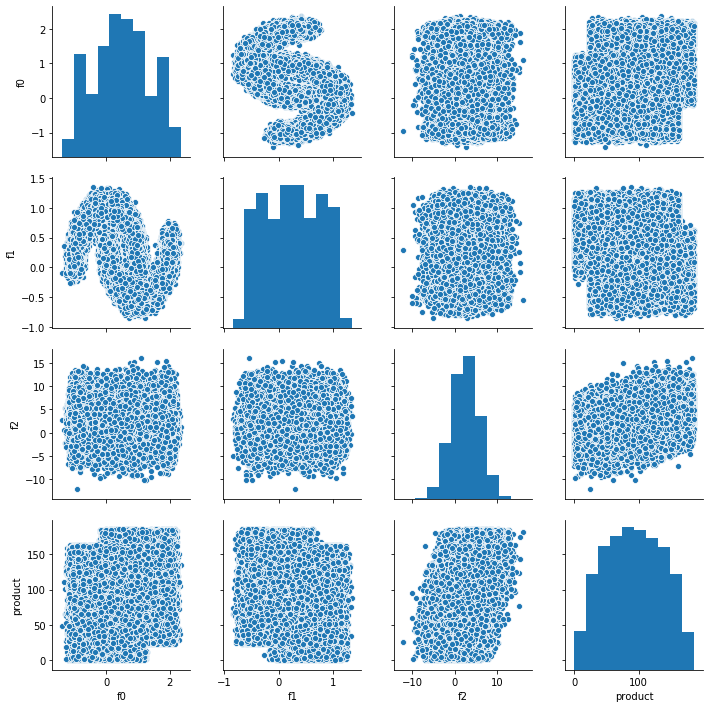

Region 1:


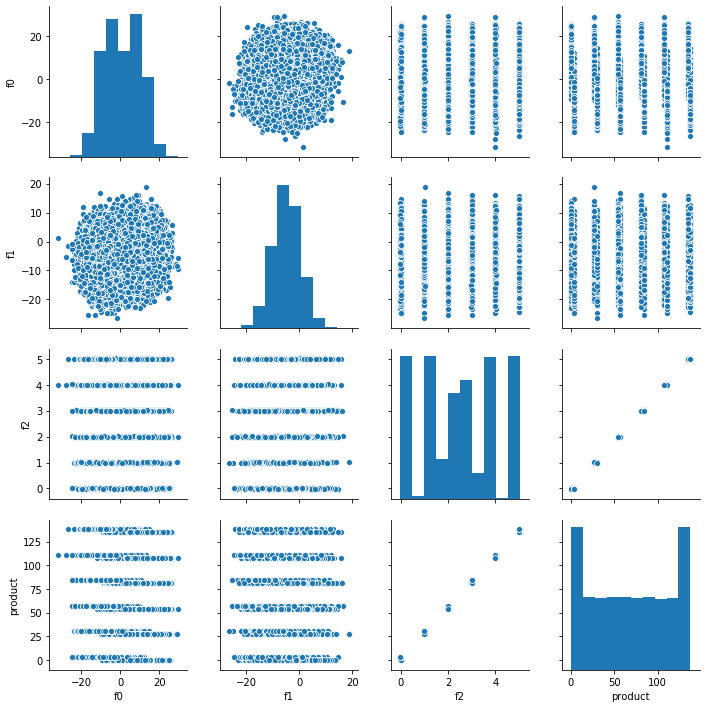

Region 2:


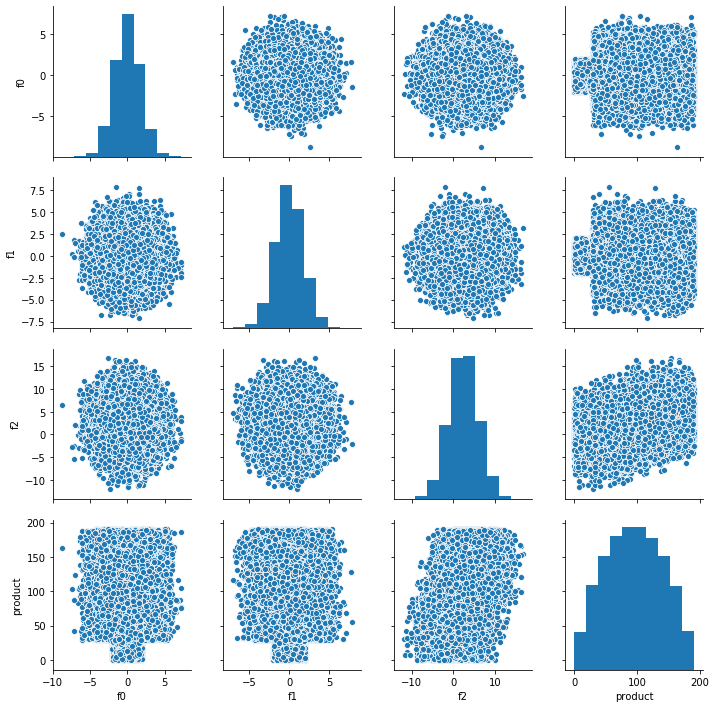

In [6]:
print(BOLD + 'Paired scatter diagrams of well features for different regions' + END)
for i in range(3):
    print('Region {}:'.format(i))
    sns.pairplot(data[i].drop(['id'], axis=1))
    plt.show()

_The scatter plots correspond to the conclusions drown based on the correlation matrices._

_Note that the connection between `'f0'`, `'f1'` features is nonlinear for region 0, the point cloud consists of two parabolas, which indicates the presence of another factor affecting the function describing the relationship between these features._

_The features `'f2'` and `'product'` do indeed have a strict linear relationship for the region 1. One feature 'f2' is enough to build a forecasting model for volume of reserves._

_The features `'f2'` and `'product'` have discrete values for the region 1._

## 3. Building a Model to Predict Volume of Reserves for Each Region
<a id='section3'></a>

Let's build a model for predicting the volume of reserves in the new wells in each region.

In [7]:
# function for train and test the linear regression model for a region
def fit_model(region, model = LinearRegression()):
    print(BOLD + 'Region {}:'.format(region) + END)
    
    target = data[region]['product'] 
    features = data[region].drop(['id', 'product'], axis=1) 
    
    features_train, features_valid, target_train, target_valid = train_test_split( 
        features, target, test_size=0.25, random_state=12345 
    ) 
    
    # It is not necessary to standardize features, 
    # since we don't have a assignment of interpreting linear regression coefficients.
    model.fit(features_train, target_train) 
    predicted_valid = model.predict(features_valid) 
    mse = mean_squared_error(target_valid, predicted_valid) 
    mse_const = mean_squared_error(target_valid, [target_train.mean()] * len(features_valid))

    print('Average volume of predicted reserves is {:.1f} thousand barelles.'.format(predicted_valid.mean())) 
    print('RMSE is {:.2f} thousand barelles.'.format(mse ** 0.5))
    print('RMSE for the constant model is {:.2f} thousand barelles.'.format(mse_const ** 0.5))
    print()
    
    # Let's return the target and prediction values in a validation dataset 
    # for further evaluation of potential profit and risks evaluation
    return target_valid.reset_index(drop=True), pd.Series(predicted_valid)

# running training and testing the linear regression model for each region
print(BOLD + 'Testing the linear regression model for each region' + END)
targets = []
predictions = []
for i in range(3):
    region_targets, region_predictions = fit_model(i)
    targets.append(region_targets)
    predictions.append(region_predictions)

Testing the linear regression model for each region
Region 0:
Average volume of predicted reserves is 92.6 thousand barelles.
RMSE is 37.58 thousand barelles.
RMSE for the constant model is 44.29 thousand barelles.

Region 1:
Average volume of predicted reserves is 68.7 thousand barelles.
RMSE is 0.89 thousand barelles.
RMSE for the constant model is 46.02 thousand barelles.

Region 2:
Average volume of predicted reserves is 95.0 thousand barelles.
RMSE is 40.03 thousand barelles.
RMSE for the constant model is 44.90 thousand barelles.



_The root mean squared error for the regions 0 and 2 is quite large (it is comparable to the average volume of predicted reserves) although the linear regression is still better than the constant model._ 

_For the region 1 the linear regression works good and the error is not that big. In this region we could be more confident in picking the best wells in accordance with the model oil forecast._

## 4. Estimation of the Expected Profit and Risks in the Development of New Oil Wells
<a id='section4'></a>

Let's calculate the volume of reserves sufficient for developing a new wells without losses.

In [8]:
# calculating the amount of oil that we are to obtain to pay off the expenses 
budget = 100000000
one_unit_revenue = 4500 # One barrel of raw materials brings 4.5 USD, volume of reserves is in thousand barrels. 
sufficient_volume = budget / one_unit_revenue
print('The volume of reserves sufficient for developing a new well without losses is {:,.1f} units(thousand barells).'\
      .format(sufficient_volume))

The volume of reserves sufficient for developing a new well without losses is 22,222.2 units (thousand barells).


_If it is assumed that we will develop 200 wells for the allocated budget, then 200 average wells in the region 0 and 2 will give us 18,000 - 19,000 units. Thus, it is necessary that the model finds wells slightly higher than the average wells and maybe this is possible even for models with large root mean square error._ 

_200 average wells in the region 1 will only yield 14,000 units, which imply the model should be better at finding high volume wells and have much less forecast error._

Let's estimate the distribution of profit and risks when developing the 200 best wells (based on the model predictions) out of 500 oil samples using the bootstrap technique.

In [9]:
# function to calculate profit from a set of selected oil wells and model predictions
def profit(target, prediction, count): 
    prediction_sorted = prediction.sort_values(ascending=False) 
    selected = target[prediction_sorted.index][:count] 
    return one_unit_revenue * selected.sum() - budget

# specifying random state for reproducibility
state = np.random.RandomState(12345)

# function for estimating the distribution of profit and risks
def profit_stats(target, prediction):
    profits = []
    for i in range(1000):
        # extract 500 random element from the testing dataset
        target_subsample = target.sample(n=500, replace=True, random_state=state) 
        predict_subsample = prediction[target_subsample.index]
        # selecting the 200 best wells (accoding to the mosel) and estimating the profit
        profits.append(profit(target_subsample, predict_subsample, 200))  

    profits = pd.Series(profits)
    # calculating the borders of the 95% confident interval of the profit
    lower = profits.quantile(0.025) 
    upper = profits.quantile(0.975)
    
    # estimating the share of cases with losses
    risk = sum(profits<0) / len(profits)

    print(BOLD + 'The distribution of profit and risks when developing the 200 best wells out of 500' + END)
    print('Average profit: {:,.1f} USD'.format(profits.mean()))
    print('95% confidence interval for profit: [{:,.1f}, {:,.1f}]'.format(lower, upper))
    print()
    print('Risk of losses: {:.1%}'.format(risk))

# estimating the distribution of profit and risks on a validation sample
print(BOLD + 'The estimation of the profit distribution and risks of losses.' + END)
for i in range(3):
    print(BOLD + 'Region {}:'.format(i) + END)
    profit_stats(targets[i], predictions[i])
    print()

The estimation of the profit distribution and risks of losses.
Region 0:
The distribution of profit and risks when developing the 200 best wells out of 500
Average profit: 4,259,385.3 USD
95% confidence interval for profit: [-1,020,900.9, 9,479,763.5]

Risk of losses: 6.0%

Region 1:
The distribution of profit and risks when developing the 200 best wells out of 500
Average profit: 5,182,594.9 USD
95% confidence interval for profit: [1,281,232.3, 9,536,129.8]

Risk of losses: 0.3%

Region 2:
The distribution of profit and risks when developing the 200 best wells out of 500
Average profit: 4,201,940.1 USD
95% confidence interval for profit: [-1,158,526.1, 9,896,299.4]

Risk of losses: 6.2%



_In the region 1, the linear regression model shows the highest average profit, and the 95% confidence interval for profit does not include 0. Accordingly, the risk of losses is quite low. Only in this region the risk of losses does not exceed the fixed risk of 2.5%._

_But in other regions, on average, oil reserves are higher. Perhaps other models will allow us to get more profit if we are willing to sacrifice the interpretability of the model._

Let's train and test the gradient boosting regression model.

In [10]:
# running training and testing the gradient boosting regression model for each region
print(BOLD + 'Testing the gradient boosting regression model for each region' + END)
targets = []
predictions = []
for i in range(3):
    region_targets, region_predictions = fit_model(i, GradientBoostingRegressor(random_state=12345, n_estimators=100))
    targets.append(region_targets)
    predictions.append(region_predictions)

print(BOLD + 'The estimation of the profit distribution and risks of losses.' + END)
for i in range(3):
    print(BOLD + 'Region {}:'.format(i) + END)
    profit_stats(targets[i], predictions[i])
    print()

Testing the gradient boosting regression model for each region
Region 0:
Average volume of predicted reserves is 92.6 thousand barelles.
RMSE is 37.07 thousand barelles.
RMSE for the constant model is 44.29 thousand barelles.

Region 1:
Average volume of predicted reserves is 68.7 thousand barelles.
RMSE is 0.73 thousand barelles.
RMSE for the constant model is 46.02 thousand barelles.

Region 2:
Average volume of predicted reserves is 95.0 thousand barelles.
RMSE is 37.73 thousand barelles.
RMSE for the constant model is 44.90 thousand barelles.

The estimation of the profit distribution and risks of losses.
Region 0:
The distribution of profit and risks when developing the 200 best wells out of 500
Average profit: 4,985,221.0 USD
95% confidence interval for profit: [-264,507.4, 10,345,117.1]

Risk of losses: 3.3%

Region 1:
The distribution of profit and risks when developing the 200 best wells out of 500
Average profit: 5,047,594.6 USD
95% confidence interval for profit: [760,604.2,

_The root mean square error decreased by more than 5% in the region 2._

_The highest average profit is achieved in the region 2, the confidence interval for profit does not cover 0 and is shifted more in the area of positive values in comparison with others, and the risks of losses are significantly reduced. So gradient boosting allows us to get the best result in the region 2._

_Gradient boosting also works poorly for the region 0 as does linear regression. Probably, other characteristics of oil samples can be obtained to better predict oil reserves in this region._

## 5. Overall Conclusion and Basic Recommendations
<a id='section5'></a>

There are data on oil samples from three regions to forecast the volume of reserves in the new wells and choose the region with the highest expected profit margin and acceptable risk of losses.

Data available from 100,000 wells in each region. Nevertheless, the characteristics of oil samples and the volume of reserves vary greatly from region to region. Apparently, the data were collected in different ways as well. What stands out is the fact that the volume of reserves in the region 1 is distributed evenly. There are a small number of well volumes, for each of which the number of wells is approximately the same (tens of thousands). It is worth checking why the distribution is uniform. 

In the regions 0 and 2 a well has an average of about 90 thousand barrels of oil, when the average volume of reserves in the region 1 is only 70 thousand barrels. There are wells with zero available oil reserves, for the region 0 there are much more of them.

No linear relationship was found between the feature `'f0'`, `'f1'` and the volume of reserves for the regions 1 and 2. A strict linear relationship was revealed between the feature`'f2'` and the volume of oil reserves for the region 1.

The linear model for predicting oil reserves in a well in regions 0 and 2 gives a large error, which leads to an unacceptable risk of losses when using this model to select the best set of wells for development in terms of expected profitability. In region 1, the linear model makes it possible to make a sufficiently accurate prediction that the model gives the gross margin of 5% on avarage (which is more than for the other two regions) and a very low risk of loss, which is 0.3%. __If the interpretability of the model is extremely important to us, then we should choose region 1 for the development of wells and a linear model for choosing the best locations.__

Nevertheless, the gradient boosting model allows us to get even better result in the region 2. The average profit is 7 thousand USD, which corresponds to an average gross margin of 6.5%. The risk of losses is 0.7%. Thus, __we can select the region 2 for development and use the gradient boosting model to predict oil reserves in the wells and select the best set of wells for development.__

It makes sense to obtain other characteristics of oil samples in order to better predict oil reserves, especially for region 0.